In [ ]:
!pip install -q spectral

In [ ]:
matplotlib.rcParams['figure.figsize'] = (15,10)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tifffile as tif
import math
from spectral import imshow
from sklearn.metrics import mean_squared_error as mse

In [ ]:
# Bibliotecas
import numpy as np
import tifffile as tif
from spectral import imshow

In [ ]:
# Leitura das imagens
original = tif.imread('/content/drive/MyDrive/Sentinel-1/20171206.tif')
lee3 = tif.imread('/content/drive/MyDrive/Sentinel-1/Lee3_Spk.tif')
lee5 = tif.imread('/content/drive/MyDrive/Sentinel-1/Lee5_Spk.tif')
frost3 = tif.imread('/content/drive/MyDrive/Sentinel-1/Frost3_Spk.tif')
frost5 = tif.imread('/content/drive/MyDrive/Sentinel-1/Frost5_Spk.tif')


In [ ]:
# Criando matrizes onde serão armazenados os RMSE (em 1 dimensão)
L3 = np.zeros_like(original.ravel())
L5 = np.zeros_like(original.ravel())
F3 = np.zeros_like(original.ravel())
F5 = np.zeros_like(original.ravel())

In [ ]:
# Cálculo do RMSE
for i in range(original.size):
  L3[i] = np.sqrt(np.square(lee3.ravel()[i] - original.ravel()[i]).mean())
  L5[i] = np.sqrt(np.square(lee5.ravel()[i] - original.ravel()[i]).mean())
  F3[i] = np.sqrt(np.square(frost3.ravel()[i] - original.ravel()[i]).mean())
  F5[i] = np.sqrt(np.square(frost5.ravel()[i] - original.ravel()[i]).mean())

In [ ]:
# Voltando os resultados para 2 dimensões
L3 = L3.reshape(original.shape)
L5 = L5.reshape(original.shape)
F3 = F3.reshape(original.shape)
F5 = F5.reshape(original.shape)

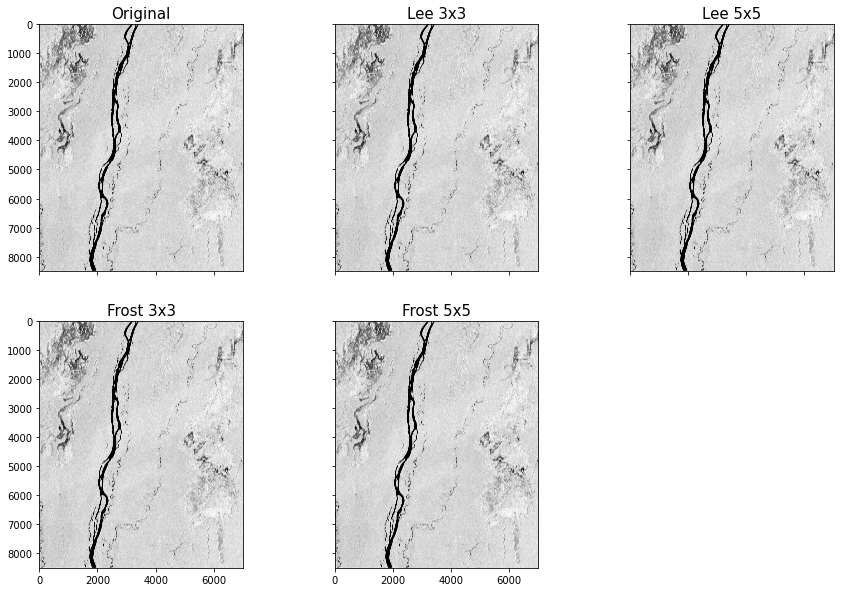

In [ ]:
#Visualização
fig,axes = plt.subplots(2,3,figsize=(15,10),sharex='all', sharey='all')
axes = axes.ravel()

axes[0].imshow(original,cmap='gray')
axes[0].set_title('Original',fontsize=15)

axes[1].imshow(lee3,cmap='gray')
axes[1].set_title('Lee 3x3',fontsize=15)

axes[2].imshow(lee5,cmap='gray')
axes[2].set_title('Lee 5x5',fontsize=15)

axes[3].imshow(frost3,cmap='gray')
axes[3].set_title('Frost 3x3',fontsize=15)

axes[4].imshow(frost5,cmap='gray')
axes[4].set_title('Frost 5x5',fontsize=15)
plt.axis('off')
plt.show()

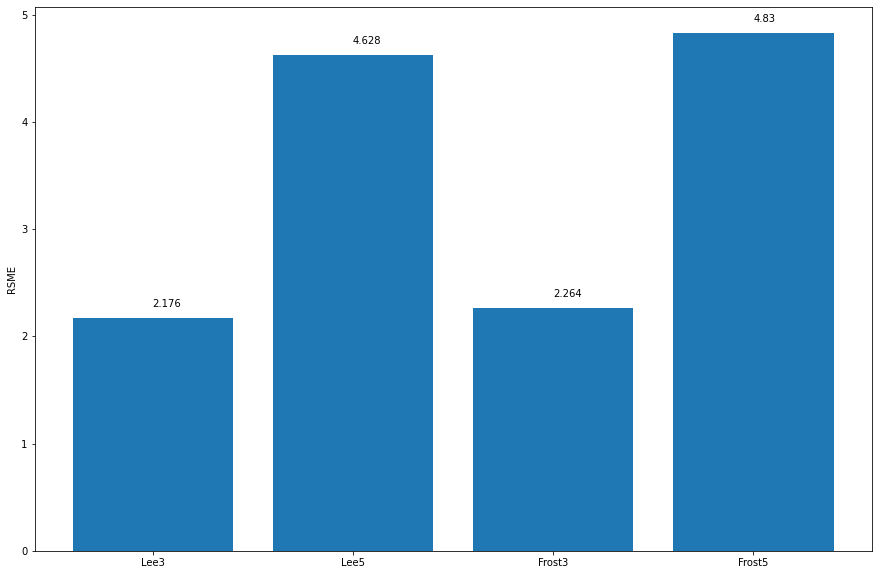

In [ ]:
#Visualização  do RMSE em gráfico
labels = ['Lee3','Lee5','Frost3','Frost5']
rmse = [L3,L5,F3,F5]

plt.bar([0,1,2,3],rmse)
plt.xticks([0,1,2,3], labels)
plt.ylabel('RSME')

for index, data in enumerate(rmse):
    plt.text(x=index, y= data + 0.1, s=f"{data}")
plt.show()